# Проект: Спрос на рейсы авиакомпании

**Описание проекта**

Я аналитик российской авиакомпании "F9" (название вымышленное), выполняющей внутренние пассажирские перевозки. Важно понять предпочтения пользователей, покупающих билеты на разные направления.

Мне нужно изучить базу данных и проанализировать спрос пассажиров на рейсы в города, где проходят крупнейшие культурные фестивали.

**Описание данных**

Файлы с данными:

`query_1.csv` — результат первого запроса из базы SQL. В нём содержится такая информация:

- `model` — модель самолета;
- `flights_amount` — количество рейсов для каждой модели самолетов в сентябре 2018 года.

`query_3.csv` — результат третьего запроса из базы SQL. В нём содержится такая информация:

- `city` — город;
- `average_flights` — среднее количество рейсов, прибывающих в город за день в сентябре 2018 года.

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Импорт-библиотек" data-toc-modified-id="Импорт-библиотек-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Импорт библиотек</a></span></li><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Аналитический-анализ-данных" data-toc-modified-id="Аналитический-анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Аналитический анализ данных</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

## Импорт библиотек

Импортируем необходимые библиотеки:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Загрузка данных

Загрузим данные и посмотрим на них:

In [2]:
df_aircrafts = pd.read_csv('/datasets/query_1.csv')
df_cities = pd.read_csv('/datasets/query_3.csv')

In [3]:
def info(df):
    print('---------------------------------------')
    print('Data:')
    display(df)
    print('---------------------------------------')
    print('Info:')
    print(df.info())
    print('---------------------------------------')
    print('Sample:')
    display(df.sample(5, random_state=555))
    print('---------------------------------------')

In [4]:
info(df_aircrafts)

---------------------------------------
Data:


,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


---------------------------------------
Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes
None
---------------------------------------
Sample:


,model,flights_amount
7,Sukhoi SuperJet-100,4185
3,Boeing 767-300,600
4,Boeing 777-300,300
0,Airbus A319-100,607
5,Bombardier CRJ-200,4446


---------------------------------------


In [5]:
info(df_cities)

---------------------------------------
Data:


,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613
...,...,...
96,Чита,1.580645
97,Элиста,4.870968
98,Южно-Сахалинск,4.290323
99,Якутск,2.741935


---------------------------------------
Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB
None
---------------------------------------
Sample:


,city,average_flights
43,Москва,129.774194
72,Саратов,4.000000
57,Ноябрьск,3.000000
7,Белоярский,2.000000
9,Братск,1.000000


---------------------------------------


На первый взгляд видно:
- пропусков в данных нет;
- типы данных соответствуют содержанию;
- в обеих таблицах есть объекты с небольшими значениями, и есть явные выделяющиеся по значениям.

## Аналитический анализ данных

Сперва посмотрим на города с наибольшим количеством рейсов. Выведем топ-10 таких городов:

In [6]:
df_cities_top = df_cities.sort_values(by='average_flights', ascending=False).head(10)
df_cities_top

,city,average_flights
43,Москва,129.774194
70,Санкт-Петербург,31.161290
54,Новосибирск,17.322581
33,Красноярск,11.580645
20,Екатеринбург,11.322581
67,Ростов-на-Дону,10.193548
63,Пермь,10.129032
10,Брянск,10.000000
74,Сочи,9.612903
84,Ульяновск,9.580645


Лидером по количеству полётов является Москва, после идут Санкт-Петербург и Новосибирск. Остальные города с почти одинаковыми значениями.

Теперь выведем графики. Создадим функцию для вывода необходимого графика:

In [7]:
def show_top(size, df, name, count, title):
    plt.figure(figsize=size, dpi=80)
    df = df.sort_values(by=count, ascending=True)
    plt.barh(df[name], df[count])
    plt.title(title)
    plt.grid(linestyle='dotted', alpha=.5)
    plt.show()

Посмотрим на разницу количества полётов среди моделей самолётов:

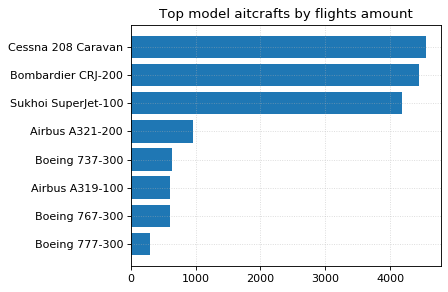

In [8]:
show_top(
    (5, 4), df_aircrafts, 'model', 'flights_amount',
    'Top model aitcrafts by flights amount'
)

В топ-3 с небольшим различием вошли самолёты: Cessna, Bombardier и Sukhoi Superjet. Все модели Airbus и Boeing сильно отстают, видимо эти модели самолётов не сильно популярны для внутренних перевозок, либо их не так выгодно содержать по сравнению с лидирующими моделями.

Теперь взглянем на количество рейсов в различные города:

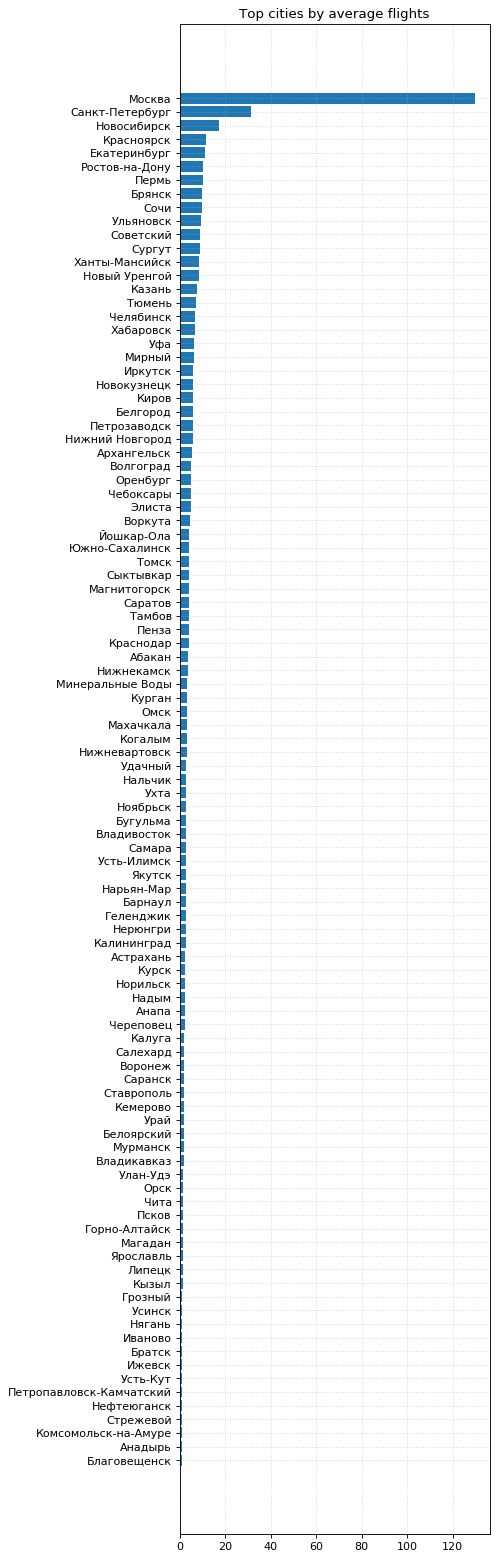

In [9]:
show_top((5, 25), df_cities, 'city', 'average_flights', 'Top cities by average flights')

Самое большое количество рейсов в столице и крупных городах России.

И наконец посмотрим на топ-10 городов по количеству рейсов: 

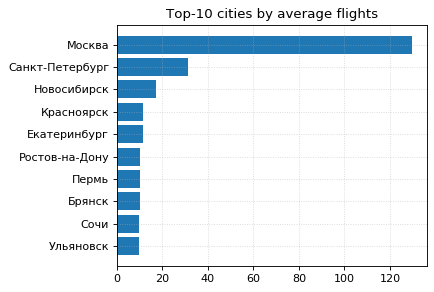

In [10]:
show_top((5, 4), df_cities_top, 'city', 'average_flights', 'Top-10 cities by average flights')

Как уже было видно из таблицы: лидирует Москва, далее Санкт-Петербург и Новосибирск, остальные города почти равны по количеству рейсов.

## Вывод

Столица России ожидаемо лидирует по количеству рейсов. Думаю это связано не только с тем, что из Москвы можно полететь практически в любой город России. Но и с тем, что между многими городами нет прямых рейсов и чтобы попасть из одного города в другой приходится лететь как раз через Москву.

Для внутренних перелётов, скорее всего используют самолёты, которые дешевле содержать, чтобы снизить стоимость перелётов. Видимо с этим связано то, что самолёты Boeing и Airbus не так часто используют по сравнению с остальными.